In [0]:
#CIFAR 100 CNN

In [0]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os
import pickle
import numpy as np
import h5py

In [8]:
num_classes = 100

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

169009152/169001437 [==============================] - 19s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 256)       0         
__________

In [13]:
epochs = 200
data_augmentation = True
num_predictions = 20
batch_size = 64
validations = []

for i in range(epochs):
  print('Using real-time data augmentation.')
  
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
      featurewise_std_normalization=False,  # divide inputs by std of the dataset
      samplewise_std_normalization=False,  # divide each input by its std
      zca_whitening=False,  # apply ZCA whitening
      rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
      height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
      horizontal_flip=True,  # randomly flip images
      vertical_flip=False)  # randomly flip images

  datagen.fit(x_train)

  model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=1,verbose=1,validation_data=(x_test, y_test))

  val_acc = model.evaluate_generator(datagen.flow(x_test, y_test,batch_size=batch_size),steps=x_test.shape[0] // batch_size)
  validations.append(val_acc)
  print("Val Acc : ",val_acc)

pickle.dump(validations, open("loss_validation.p",'wb'))

Using real-time data augmentation.
Epoch 1/1
781/781 [==============================] - 62s 79ms/step - loss: 3.9965 - acc: 0.0965 - val_loss: 3.4186 - val_acc: 0.2124
Val Acc :  [3.489779693958087, 0.19230769230769232]
Using real-time data augmentation.
Epoch 1/1
781/781 [==============================] - 61s 79ms/step - loss: 3.4675 - acc: 0.1821 - val_loss: 3.0321 - val_acc: 0.2725
Val Acc :  [3.078525115282108, 0.269130608974359]
Using real-time data augmentation.
Epoch 1/1
781/781 [==============================] - 61s 79ms/step - loss: 3.1809 - acc: 0.2351 - val_loss: 2.7842 - val_acc: 0.3230
Val Acc :  [2.8687983659597545, 0.3141025641025641]
Using real-time data augmentation.
Epoch 1/1
781/781 [==============================] - 61s 78ms/step - loss: 3.0030 - acc: 0.2696 - val_loss: 2.5903 - val_acc: 0.3519
Val Acc :  [2.6771368025205073, 0.339443108974359]
Using real-time data augmentation.
Epoch 1/1
781/781 [==============================] - 61s 78ms/step - loss: 2.8659 - acc:

In [23]:
 datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
      featurewise_std_normalization=False,  # divide inputs by std of the dataset
      samplewise_std_normalization=False,  # divide each input by its std
      zca_whitening=False,  # apply ZCA whitening
      rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
      height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
      horizontal_flip=True,  # randomly flip images
      vertical_flip=False)  # randomly flip images


# Evaluate model with test data set and share sample prediction results
evaluation = model.evaluate_generator(datagen.flow(x_test, y_test,batch_size=128),steps=x_test.shape[0] // 128)

print('Model Accuracy = %.2f' % (evaluation[1]))

Model Accuracy = 0.65


In [0]:
predicted_output = model.predict(x_test)
predicted_output = [np.argmax(i) for i in predicted_output]

In [25]:
len(predicted_output)

10000

In [0]:
actual_output = [np.argmax(i) for i in y_test]

In [27]:
len(actual_output)

10000

In [28]:
number_correct = 0
for i in range(len(predicted_output)):
  if(predicted_output[i]==actual_output[i]):
    number_correct +=1
print("Accurcay is : ",number_correct/len(predicted_output))

Accurcay is :  0.6599


In [29]:
#Calculating top 5 accuracy
top_5_count = 0

i=0
pred = model.predict(x_test)
for op in pred:
  #print(op.shape)
  op_idx=list(op)
  op_idx.sort(reverse = True)
  op = list(op)
  #print(op_idx[0:5])
  for p in op_idx[0:5]:
    idx = op.index(p)
    if(idx==actual_output[i]):
      top_5_count+=1
  i+=1

print("Top 5 accuracy is : ",top_5_count/len(actual_output))

Top 5 accuracy is :  0.8836


In [0]:
from sklearn.metrics import f1_score

In [31]:
f1score = f1_score(actual_output,predicted_output,average='weighted')

print("F1 Score is : ",f1score)

F1 Score is :  0.6667544068147461


In [0]:
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(actual_output,predicted_output,average='weighted')

print("Recall Score is : ",recall)

Recall Score is :  0.6599


In [0]:
from sklearn.metrics import precision_score

In [35]:
precision = precision_score(actual_output,predicted_output,average='weighted')

print("Precision is : ",precision)

Precision is :  0.6886043138408627


In [36]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
model.save("/content/gdrive/My Drive/8th Semester Project/cifar100.h5")

In [0]:
#LIME ANALYSIS

In [3]:
!pip install lime

    100% |████████████████████████████████| 276kB 16.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/48/13/7c/20792e4efe5fd04237c0ac92bc8551acfe36392e09953ac8ea
Successfully built lime


In [0]:
from keras.models import load_model

model = load_model("/content/gdrive/My Drive/8th Semester Project/cifar100.h5")

In [98]:
data_sample_x = x_test[6]
data_sample_y = y_test[6]

data_sample_x.shape

(32, 32, 3)

In [0]:
import matplotlib.pyplot as plt

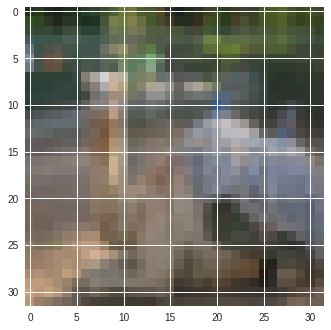

In [99]:
plt.imshow(data_sample_x)

In [0]:
def prediction_function(x):
  res = model.predict(x.reshape(-1,32,32,3))
  return res

In [0]:
import lime
from lime import lime_image

In [0]:
import cv2

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [0]:
from skimage.color import gray2rgb, rgb2gray, label2rgb
import random

In [0]:
def return_explanation_image(image,y,filename):
  
  explanation = explainer.explain_instance(image,classifier_fn = prediction_function,top_labels=2, hide_color=None, num_samples=1000, segmentation_fn=segmenter)
  output = np.argmax(y)
  
  temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=1, hide_rest=True, min_weight = 0.01)
  fig= plt.figure()
  
  (ax1) = fig.add_subplot(2,1,1)
  ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
  ax1.set_title('Positive Regions for {}'.format(output))
  
  (ax2) = fig.add_subplot(2,2,1)
  ax2.imshow(image)
  ax2.set_title("Original Image")
  
  fig.savefig(filename)
  img = cv2.imread(filename)
  
  
  fig2 = plt.figure()
  (ax3) = fig2.add_subplot(2,1,1)
  ax3.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
  ax3.set_title('Positive Regions for {}'.format(output))
  fig2.savefig('temp.jpeg')
  img2 = cv2.imread('temp.jpeg')
  
  return img2

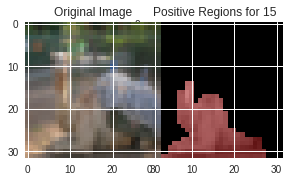

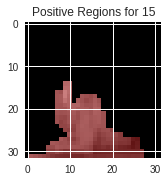

In [160]:
exp = return_explanation_image(data_sample_x,prediction_function(data_sample_x),'test.jpg')  

In [0]:
def noisy(image):
  noises = ["s&p","poisson"]
  
  idx = random.randint(0,1)
  noise_typ = noises[idx]
  
  print(noise_typ)

  if noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.01
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
  
  elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy

In [186]:
noisy_image = noisy(data_sample_x)

poisson


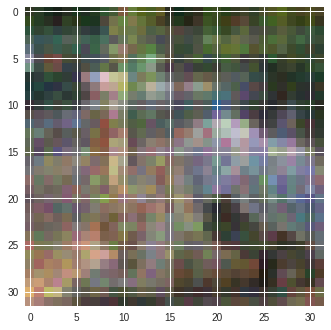

In [187]:
plt.imshow(noisy_image)

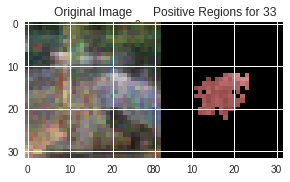

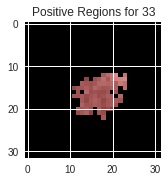

In [188]:
exp_n = return_explanation_image(noisy_image,prediction_function(noisy_image),'test1.jpg') 

In [0]:
from skimage.measure import structural_similarity as ssim

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [0]:
def compare_images(imageA, imageB, title):
  # compute the mean squared error and structural similarity
  # index for the images
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB,multichannel=True)

  # setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  # show the images
  plt.show() 
  return m,s

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


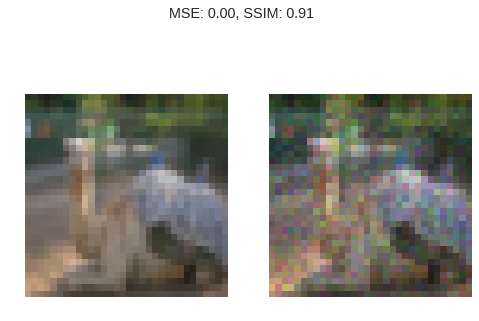

In [204]:
original_diff= compare_images(data_sample_x,np.array(noisy_image,dtype='float32'),"Image and Noisy Image") 

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


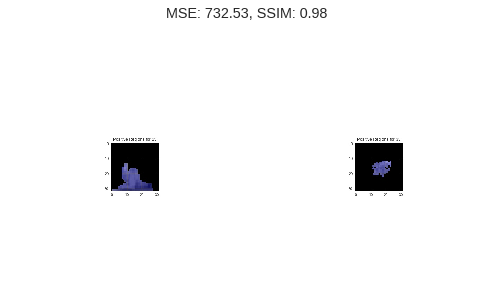

In [205]:
exp_diff, ss2 = compare_images(exp,exp_n,"Image Explanation and Noisy Image Explanation") 

In [207]:
stab = ss2/ss1
stab

1.0820647026004135

In [0]:
stabilities = []

poisson
s&p
poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


s&p


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


s&p


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


s&p


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_op

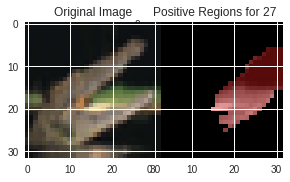

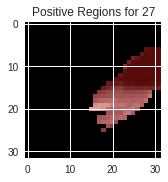

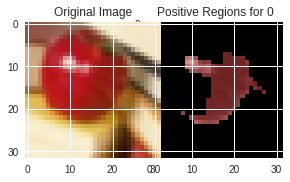

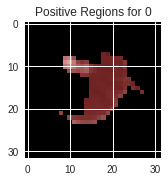

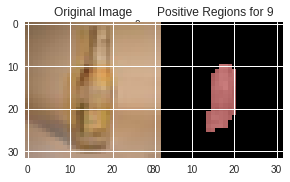

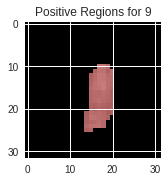

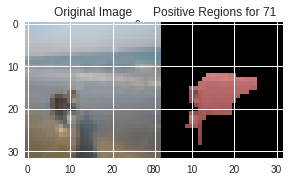

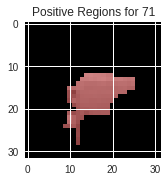

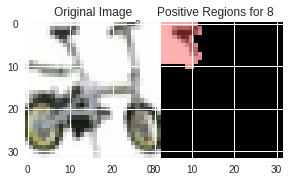

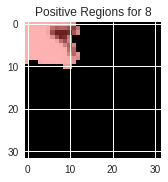

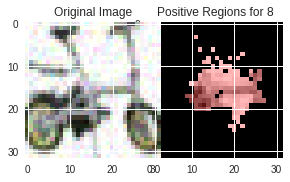

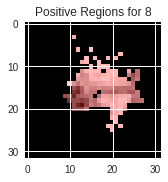

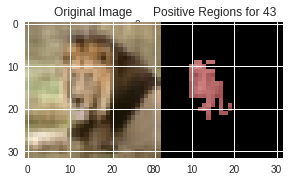

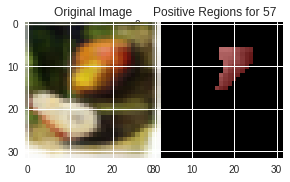

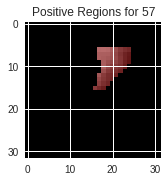

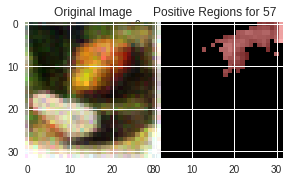

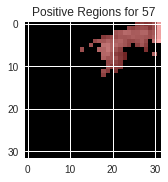

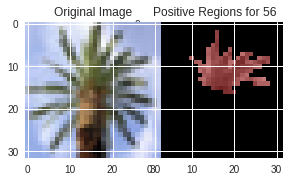

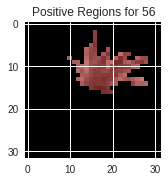

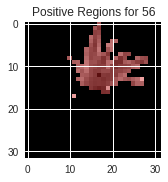

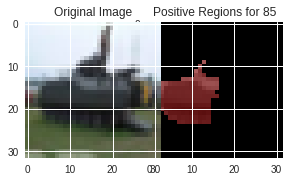

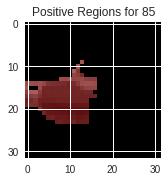

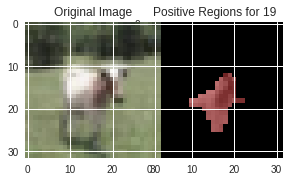

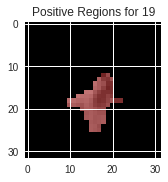

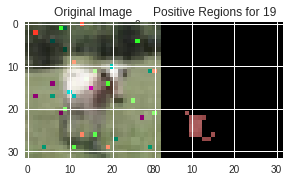

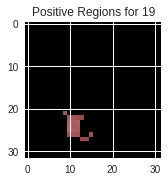

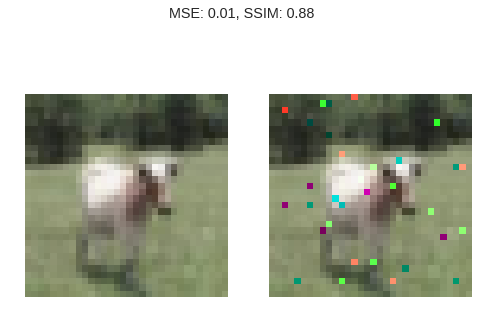

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


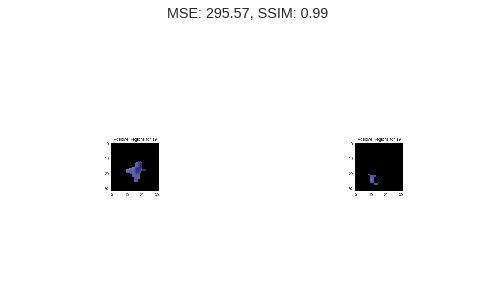

Done for  122 / 10000
poisson
poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


poisson
poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


s&p


/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


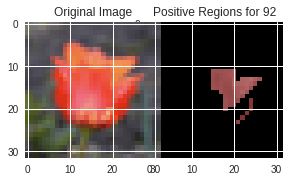

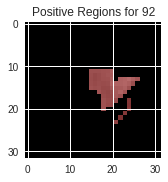

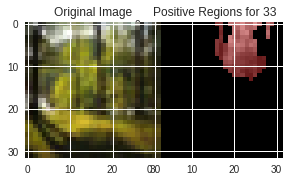

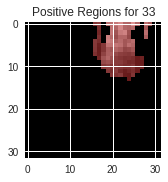

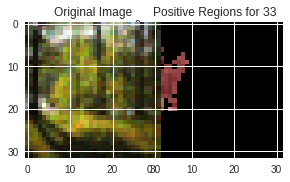

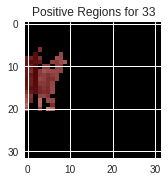

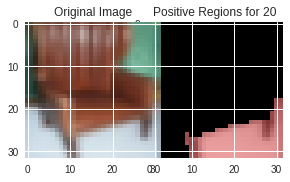

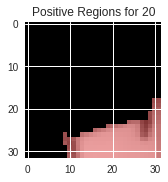

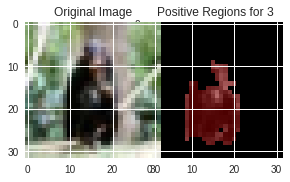

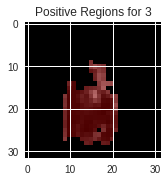

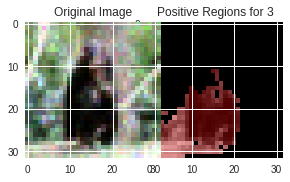

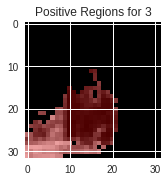

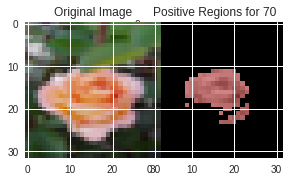

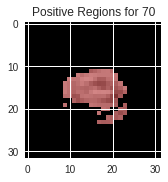

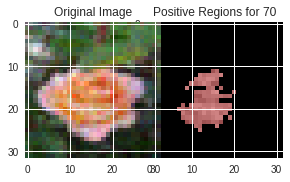

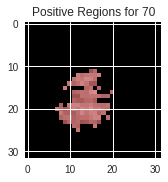

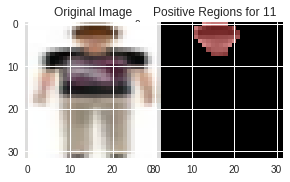

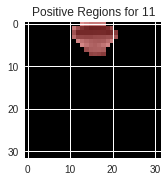

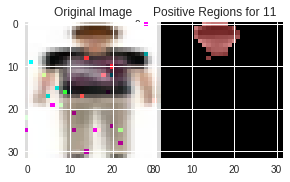

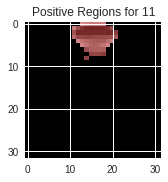

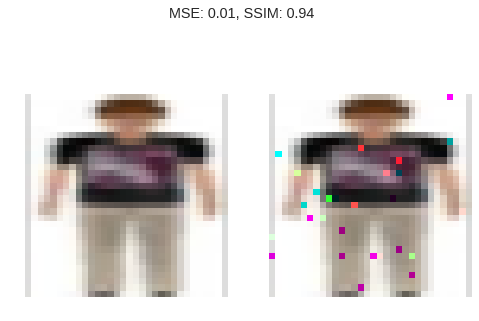

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


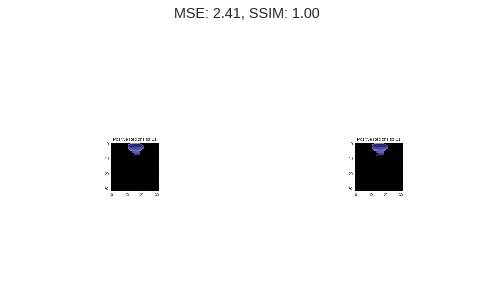

Done for  130 / 10000
s&p
s&p
poisson


/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


poisson


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


s&p


In [0]:
for i in range(len(x_test)):
  try:
    image = x_test[i]
    output = prediction_function(image)

    original_filename = "/content/gdrive/My Drive/8th Semester Project/test_1.jpeg"
    original_image_explanation = return_explanation_image(image,output,original_filename)

    noisy_input = noisy(image)

    noisy_exp_filename = "/content/gdrive/My Drive/8th Semester Project/test_2.jpeg"
    noisy_image_explanation = return_explanation_image(noisy_input,output,noisy_exp_filename)

    m1,s1 = compare_images(image,noisy_input,"Original Images")
    m2,s2 = compare_images(original_image_explanation,noisy_image_explanation,"Explanations")

    stability = s2/s1

    stabilities.append(stability)
  except : 
    continue
  print("Done for ",i,'/',len(x_test))